# Visualize the performance of the sorting algorithms
Author: Bobby Sato

**Description**

Practice with sorting algorithms and visualization

## Requirements
- run each sort on the same input array
- time how long each sort took to complete
- specify length of array, number of repetitions
- save the times it took to sort array
- graph of each sort
    - time to finish
    - which sorting algo
- run multiple times w multiple different array size

## Imports

In [106]:
import sort
from random import randint
from random import random
import numpy as np
import matplotlib.pyplot as plt
import timeit

%matplotlib inline

## Test sorts

In [107]:
def test_sorts(repetitions=1, array_len=8, bucket_num=10, rand_sort_flag=True):
    print(f"Repetitions: {repetitions}, Array length: {array_len}, Number of buckets (bucket sort): {bucket_num}, include random sort: {rand_sort_flag}")
    for rep_num in range(repetitions):
        arr = [randint(0, 100) for _ in range(array_len)]
        print("#"*60)
        print("Iteration:", rep_num)
        print("Unsorted array:", arr)
        # python sort
        copy = arr[:]
        copy.sort()
        print("Python sort is sorted:", sort.is_sorted(copy))

        # insertion sort
        copy = arr[:]
        copy = sort.insertion(copy)
        print("Insertion sort is sorted:", sort.is_sorted(copy))

        # bucket sort
        copy = arr[:]
        copy = sort.bucket(copy, bucket_num)
        print("Bucket", bucket_num, "sort is sorted:", sort.is_sorted(copy))

        # merge sort
        copy = arr[:]
        copy = sort.merge_sort(copy)
        print("Merge sort is sorted:", sort.is_sorted(copy))

        # quick sort
        copy = arr[:]
        copy = sort.quick(copy)
        print("Quick sort is sorted:", sort.is_sorted(copy))

        if rand_sort_flag:
            # quick sort
            copy = arr[:]
            sort.rand(copy)
            print("Random sort is sorted:", sort.is_sorted(copy))
        
        print("Sorted array:", copy)

In [108]:
test_sorts(repetitions=1, array_len=8, bucket_num=10, rand_sort_flag=True)

Repetitions: 1, Array length: 8, Number of buckets (bucket sort): 10, include random sort: True
############################################################
Iteration: 0
Unsorted array: [7, 70, 32, 90, 24, 94, 48, 25]
Python sort is sorted: True
Insertion sort is sorted: True
Bucket 10 sort is sorted: True
Merge sort is sorted: True
Quick sort is sorted: True
Random sort is sorted: True
Sorted array: [7, 24, 25, 32, 48, 70, 90, 94]


## Run on different inputs

In [109]:
sort_name_table = dict()
sort_name_table['python']    = 0
sort_name_table['insertion'] = 1
sort_name_table['bucket']    = 2
sort_name_table['merge']     = 3
sort_name_table['quick']     = 4
sort_name_table['random']    = 5

In [221]:
def time_sorts(repetitions=1, array_len=8, bucket_num=10, rand_sort_flag=True, verbose=False):
    print(f"Repetitions: {repetitions}, Array length: {array_len}, Number of buckets (bucket sort): {bucket_num}, include random sort: {rand_sort_flag}")

    number_of_sorts = len(sort_name_table.keys())
    if not rand_sort_flag:
        number_of_sorts -= 1

    times = np.zeros((number_of_sorts, repetitions))

    for rep_num in range(repetitions):
        arr = [randint(0, 100) for _ in range(array_len)]
        if verbose:
            print("#"*60)
            print("Iteration:", rep_num)
            print("Unsorted array:", arr)
        # python sort
        copy = arr[:]
        start = timeit.default_timer()
        copy.sort()
        dur = timeit.default_timer() - start
        times[sort_name_table['python']][rep_num] = dur

        # insertion sort
        copy = arr[:]
        start = timeit.default_timer()
        copy = sort.insertion(copy)
        dur = timeit.default_timer() - start
        times[sort_name_table['insertion']][rep_num] = dur

        # bucket sort
        copy = arr[:]
        start = timeit.default_timer()
        copy = sort.bucket(copy, bucket_num)
        dur = timeit.default_timer() - start
        times[sort_name_table['bucket']][rep_num] = dur

        # merge sort
        copy = arr[:]
        start = timeit.default_timer()
        copy = sort.merge_sort(copy)
        dur = timeit.default_timer() - start
        times[sort_name_table['merge']][rep_num] = dur

        # quick sort
        copy = arr[:]
        start = timeit.default_timer()
        copy = sort.quick(copy)
        dur = timeit.default_timer() - start
        times[sort_name_table['quick']][rep_num] = dur

        if rand_sort_flag:
            # quick sort
            copy = arr[:]
            start = timeit.default_timer()
            sort.rand(copy)
            dur = timeit.default_timer() - start
            times[sort_name_table['random']][rep_num] = dur
    print("Done")
    return np.asarray(times)

In [222]:
times = time_sorts(repetitions=5)

Repetitions: 5, Array length: 8, Number of buckets (bucket sort): 10, include random sort: True
Done


In [253]:
def compute_avg_times(times):
    num_to_name = {num: sort_name for sort_name, num in sort_name_table.items()}
    res = []
    for sort_num, sort_times in enumerate(times):
        avg = np.average(sort_times)
        print(num_to_name[sort_num], "average time:", avg)
        res.append(avg)
    return res

In [254]:
avg_times = compute_avg_times(times)

python average time: 0.0010936390001006658
insertion average time: 4.035176948300159
bucket average time: 0.40492450789997747
merge average time: 0.06558025189997352
quick average time: 0.013669102399944677


## Visualize

### Visualization Functions

In [255]:
def plot_times(times):
    plt.figure(figsize = (8,6))
    plt.plot(times[sort_name_table['python']], label='python default (Tim) sort')
    plt.plot(times[sort_name_table['insertion']], label='insertion sort')
    plt.plot(times[sort_name_table['bucket']], label='bucket sort')
    plt.plot(times[sort_name_table['merge']], label='merge sort')
    plt.plot(times[sort_name_table['quick']], label='quick sort')
    plt.legend(["Tim", "Insertion", "Bucket", "Merge", "Quick"])

    plt.xlabel("Run #")
    plt.ylabel("Execution time (seconds)")
    plt.title("Execution time of different sorting algorithms (" +str(array_len)+") array length")

    plt.show()

In [268]:
def subplot_times(times, avg_times):
    plt.figure(figsize=(14,14))
    

    sub1 = plt.subplot(3, 3, 1)
    sub2 = plt.subplot(3, 3, 2)
    sub3 = plt.subplot(3, 3, 3)
    sub4 = plt.subplot(3, 3, 4)
    sub5 = plt.subplot(3, 3, 5)
    sub6 = plt.subplot(3, 3, 6)

    sub1.plot(times[sort_name_table['python']], 'r')
    sub1.set_title("Tim Sort (python default)")

    sub2.plot(times[sort_name_table['insertion']], 'g')
    sub2.set_title("Insertion Sort")

    sub3.plot(times[sort_name_table['bucket']], 'b')
    sub3.set_title("Bucket Sort")

    sub4.plot(times[sort_name_table['merge']], 'y')
    sub4.set_title("Merge Sort")

    sub5.plot(times[sort_name_table['quick']], 'm')
    sub5.set_title("Quick Sort")

    sorts = list(sort_name_table.keys())[:-1]
    sorts[0] = 'tim'
    c = ['r', 'g', 'b', 'y', 'm']
    sub6.bar(sorts, avg_times, color=c)
    sub6.set_title("Average sort times")

    plt.show()

### Visualize performance on different inputs

In [263]:
buckets = 10
rand_sort_flag = False
rep = 100
array_len = 1000
times = time_sorts(rep, array_len, buckets, rand_sort_flag)

Repetitions: 100, Array length: 1000, Number of buckets (bucket sort): 10, include random sort: False
Done


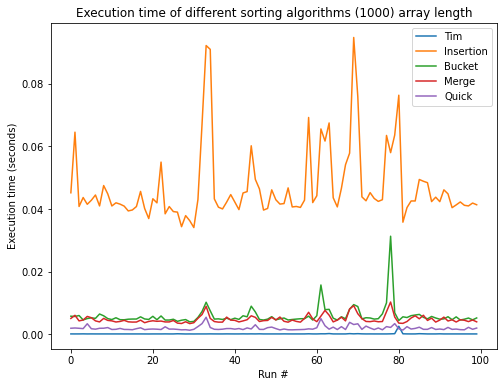

In [264]:
plot_times(times)

In [265]:
buckets = 10
rand_sort_flag = False
rep = 10
array_len = 10000
times = time_sorts(rep, array_len, buckets, rand_sort_flag)

Repetitions: 10, Array length: 10000, Number of buckets (bucket sort): 10, include random sort: False
Done


In [266]:
avg_times = compute_avg_times(times)

python average time: 0.001137185100105853
insertion average time: 4.450767130299846
bucket average time: 0.4489897151998775
merge average time: 0.0618975572000636
quick average time: 0.015249752300132969


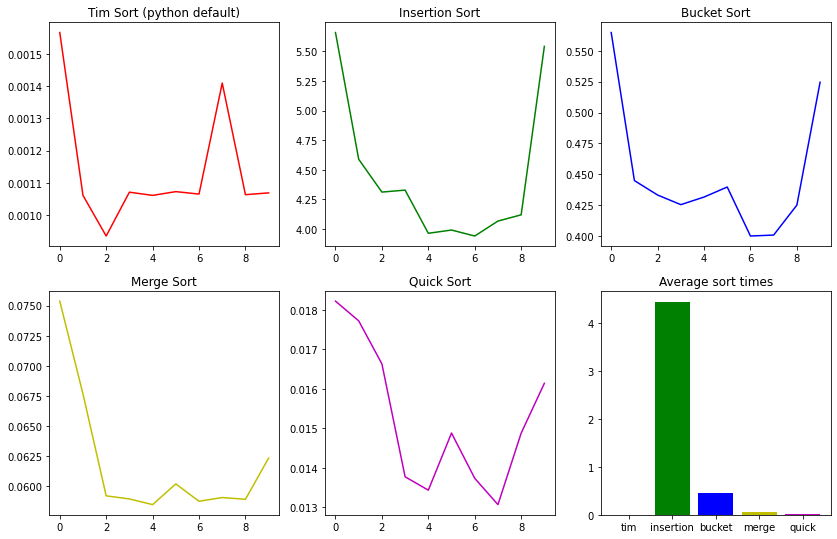

In [269]:
subplot_times(times, avg_times)